# Chapter 4: Testing and regularization with Turi Create

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from utils import *

## Defining our dataset

Plotting the polynomial $-x^2+1$

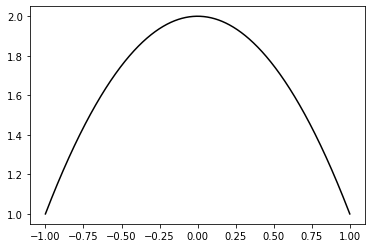

In [2]:
# Our original polynomial is -x^2+1
coefs = [2,0,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 1000)
    #plt.ylim(0,3)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

Generating a dataset of 40 points, close to this polynomial

In [3]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-1,1)
    y = polynomial(coefs, x) + random.gauss(0,0.1)
    X.append(x)
    Y.append(y)

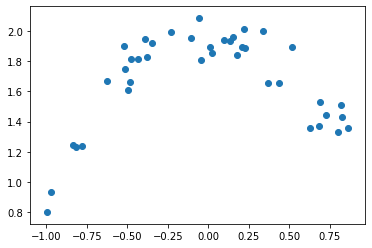

In [4]:
plt.scatter(X, Y)

## Training a polynomial regression model

Let's plot a polynomial of degree 30 to our dataset. Notice how much it overfits!

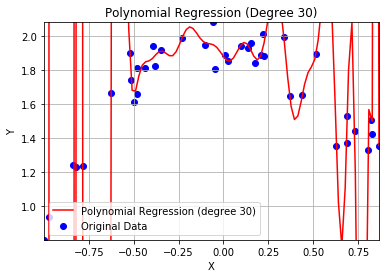

Polynomial Regression (Degree 30) Coefficients: [-1.42905053e+09 -1.47623127e+00  1.04866262e+01  3.24239732e+02
 -1.95163832e+02 -2.53666088e+04 -1.58425620e+04  8.73754939e+05
  8.00974365e+05 -1.61584767e+07 -1.56140706e+07  1.81684019e+08
  1.68230765e+08 -1.33649337e+09 -1.13301084e+09  6.70845443e+09
  5.07425340e+09 -2.34831452e+10 -1.56412978e+10  5.77202714e+10
  3.37816427e+10 -9.89354532e+10 -5.13149201e+10  1.15524793e+11
  5.40932320e+10 -8.74427078e+10 -3.79638482e+10  3.86343572e+10
  1.60557214e+10 -7.55898272e+09 -3.10769748e+09]
Polynomial Regression (Degree 30) Intercept: 1429050529.123681


In [5]:
degree_used = 30

# Example usage with the existing data X and Y
weights_degree_used, intercept_degree_used = train_and_plot_polynomial_regression(X, Y, 30)
print(f"Polynomial Regression (Degree {degree_used}) Coefficients: {weights_degree_used}")
print(f"Polynomial Regression (Degree {degree_used}) Intercept: {intercept_degree_used}")

## Splitting data into training and testing

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print("Shape of X_train:", np.shape(X_train))
print("Shape of X_test:", np.shape(X_test))
print("Shape of Y_train:", np.shape(Y_train))
print("Shape of Y_test:", np.shape(Y_test))

Shape of X_train: (32,)
Shape of X_test: (8,)
Shape of Y_train: (32,)
Shape of Y_test: (8,)


## Training a polynomial regression model with no regularization

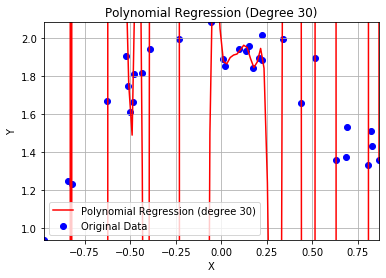

In [7]:
coefficients_and_intercept = train_and_plot_polynomial_regression(X_train, Y_train, degree_used)

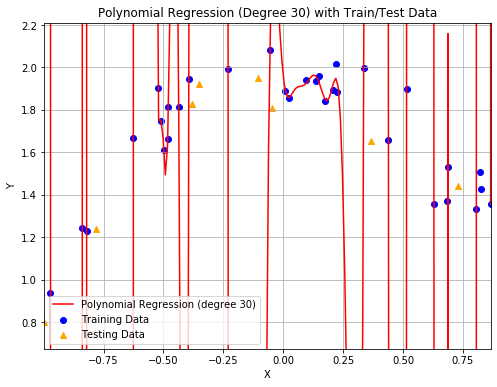

Square loss on the test set (degree 30): 6.887590331548788e+18


In [8]:

square_loss = predict_and_evaluate(coefficients_and_intercept, degree_used, X_train, Y_train, X_test, Y_test)
print(f"Square loss on the test set (degree {degree_used}): {square_loss}")

## Training a polynomial regression model with L1 regularization

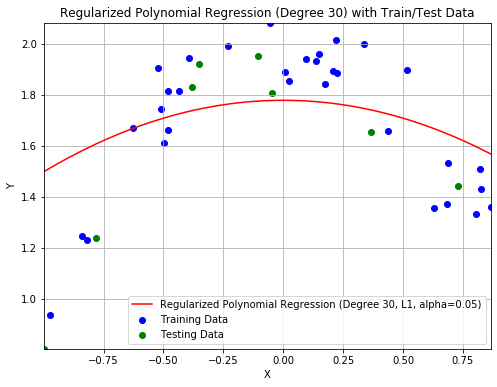

RMSE with L1 Regularization (degree 30, alpha=0.05): 0.3027448878333735


In [9]:
alpha_value = 0.05 # Example alpha value for regularization

# Train with L1 (Lasso) regularization
rmse_lasso = train_and_plot_regularized_polynomial_regression(X_train, Y_train, X_test, Y_test, degree_used, regularization_type='L1', alpha=alpha_value)
print(f"RMSE with L1 Regularization (degree {degree_used}, alpha={alpha_value:.2f}): {rmse_lasso}")

## Training a polynomial regression model with L2 regularization

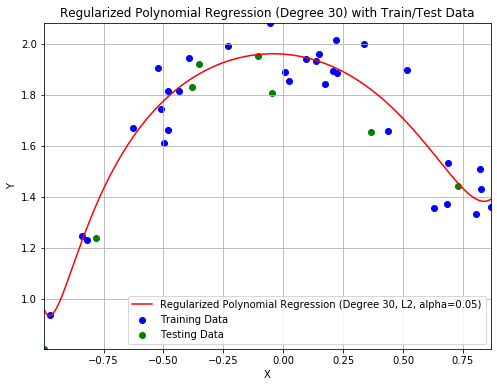

RMSE with L2 Regularization (degree 30, alpha=0.05): 0.10800013182491376


In [10]:
alpha_value = 0.05 # Example alpha value for regularization

# Train with L2 (Ridge) regularization
rmse_ridge = train_and_plot_regularized_polynomial_regression(X_train, Y_train, X_test, Y_test, degree_used, regularization_type='L2', alpha=alpha_value)
print(f"RMSE with L2 Regularization (degree {degree_used}, alpha={alpha_value:.2f}): {rmse_ridge}")